In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('indian_liver_patient.csv')

In [3]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
dataset.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [5]:
dataset.shape

(583, 11)

In [6]:
dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

#Data Cleaning

Checking Duplicate tuples, if any will be removed

In [7]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
578    False
579    False
580    False
581    False
582    False
Length: 583, dtype: bool

In [8]:
dataset.duplicated().sum()

13

In [9]:
dataset = dataset.drop_duplicates()
print( dataset.shape )

(570, 11)


#checking Missing Values

In [10]:
dataset.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

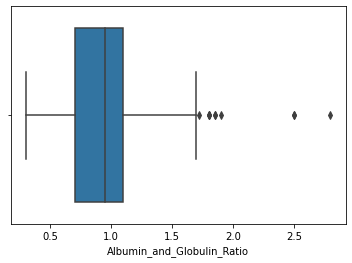

In [11]:
sns.boxplot(data = dataset, x= 'Albumin_and_Globulin_Ratio' )

Q1 = 0.700 

Q3 = 1.1000

IQR = 0.4

1.5 * 0.4 = 0.6

Q1 - 0.6 = 0.1

Q3 + 0.6 = 1.7

Anything away between 0.1 and 1.7 is considered to be an Outlier





In [12]:
dataset['Albumin_and_Globulin_Ratio'].mode()

0    1.0
dtype: float64

In [13]:
dataset['Albumin_and_Globulin_Ratio'].median()

0.95

In [14]:
dataset['Albumin_and_Globulin_Ratio'].mean()

0.9480035335689051

In [15]:
dataset['Albumin_and_Globulin_Ratio'] = dataset['Albumin_and_Globulin_Ratio'].fillna(dataset['Albumin_and_Globulin_Ratio'].median())

In [16]:
dataset.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

#Male Vs Female

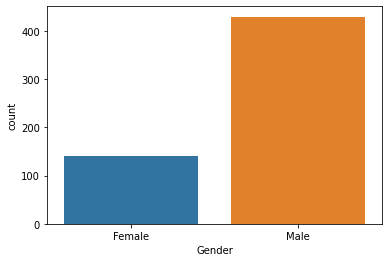

In [17]:
import seaborn as sns
sns.countplot(data = dataset, x='Gender', label='count')

In [18]:
Male, Female = dataset['Gender'].value_counts()
print('Number of patients that are male: ',Male)
print('Number of patients that are female: ',Female)


Number of patients that are male:  430
Number of patients that are female:  140


#Encoding the Gender Column

Label Male as 1 and Female as 0

In [19]:
def partition(x):
    if x == 'Male':
        return 1
    return 0

dataset['Gender'] = dataset['Gender'].map(partition)

In [20]:
dataset

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


#Converting Output Column 'Dataset' to 0's and 1's

Dataset i.e output value has '1' for liver disease and '2' for no liver disease so let's make it 0 for no disease to make it convinient

In [21]:
def partition(x):
    if x == 2:
        return 0
    return 1

dataset['Dataset'] = dataset['Dataset'].map(partition)

In [22]:
dataset['Dataset']

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 570, dtype: int64

#Correlation Matrix

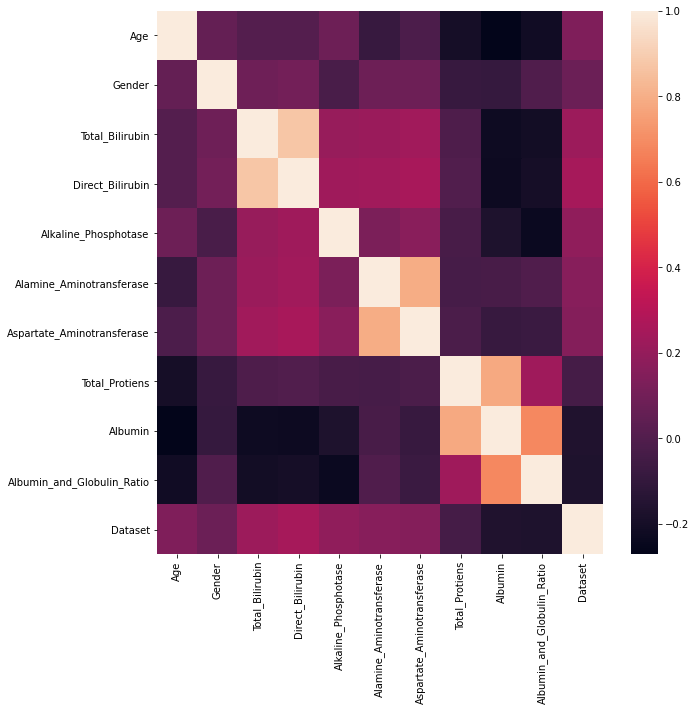

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr())

#Data Preparation

In [24]:
X = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values

In [25]:
#splitting data in to training data and test data 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X , y , test_size = 0.25, random_state = 42)

In [26]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Machine Learning Models

**Logistic Regression**

In [27]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state = 0)
log_classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# Predicting the output 
log_y_pred = log_classifier.predict(x_test)

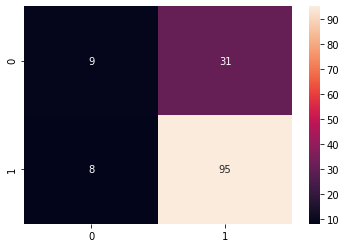

In [29]:
from sklearn.metrics import confusion_matrix
log_cm = confusion_matrix(y_test, log_y_pred)
sns.heatmap(log_cm , annot=True)

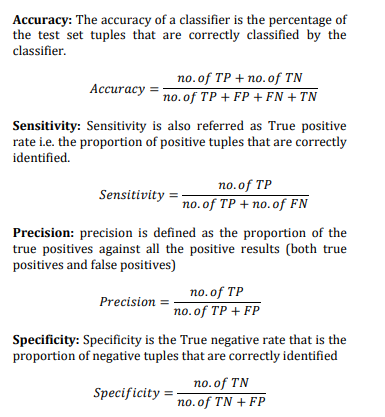

In [30]:
from sklearn.metrics import accuracy_score, precision_score
print(accuracy_score(y_test,log_y_pred))
print(precision_score(y_test , log_y_pred))

0.7272727272727273
0.753968253968254


**K Nearest Neighbors Algorithm**

In [31]:
x_train.shape

(427, 10)

In [32]:
from sklearn.neighbors import KNeighborsClassifier 
knn_classifier = KNeighborsClassifier(n_neighbors =21, metric = 'minkowski') 
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [33]:
knn_y_pred = knn_classifier.predict(x_test)

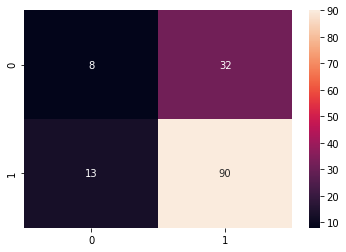

In [34]:
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(knn_cm , annot=True)

In [35]:
from sklearn.metrics import accuracy_score, precision_score
print(accuracy_score(y_test,knn_y_pred))
print(precision_score(y_test , knn_y_pred))

0.6853146853146853
0.7377049180327869


**SVM**

In [36]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'rbf', random_state = 0)
svm_classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [37]:
svm_y_pred = svm_classifier.predict(x_test)

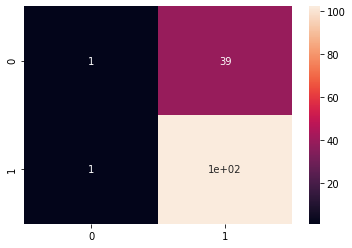

In [38]:
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(y_test, svm_y_pred)
sns.heatmap(svm_cm , annot=True)

In [39]:
from sklearn.metrics import accuracy_score, precision_score
print(accuracy_score(y_test,svm_y_pred))
print(precision_score(y_test , svm_y_pred))

0.7202797202797203
0.723404255319149


**Artificial Neural Network**

In [40]:
import keras
from keras.models import Sequential
from keras.layers import Dense,  Dropout

In [41]:
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 400 , activation='relu' , input_dim=10))
classifier.add(Dropout(rate=0.1))
# Adding Second hidden layer
classifier.add(Dense(units = 400 , activation='relu'))
classifier.add(Dropout(rate=0.1))
# Output layer
classifier.add(Dense(units = 1 , activation='sigmoid'))

In [42]:
classifier.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [43]:
classifier.fit(x_train, y_train, batch_size=32 , epochs = 100)

Epoch 1/100
14/14 [==============================] - 1s 5ms/step - loss: 0.5992 - accuracy: 0.7098
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5155 - accuracy: 0.7315
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4872 - accuracy: 0.7213
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5313 - accuracy: 0.7333
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4764 - accuracy: 0.7202
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4727 - accuracy: 0.7440
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4944 - accuracy: 0.7289
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4585 - accuracy: 0.7497
Epoch 9/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4691 - accuracy: 0.7407
Epoch 10/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4730 - accuracy: 0.7290
Epoch 11/

In [44]:
ann_y_pred = classifier.predict(x_test)

In [45]:
ann_y_pred[0]

array([0.8226053], dtype=float32)

In [46]:
ann_y_pred = ann_y_pred >=0.5

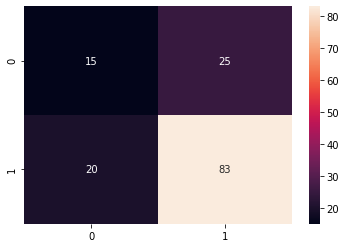

In [47]:
from sklearn.metrics import confusion_matrix
ann_cm = confusion_matrix(y_test, ann_y_pred)
sns.heatmap(ann_cm , annot=True)

In [48]:
from sklearn.metrics import accuracy_score, precision_score
print(accuracy_score(y_test,ann_y_pred))
print(precision_score(y_test , ann_y_pred))

0.6853146853146853
0.7685185185185185


#saving the models

In [49]:
import pickle
pickle.dump(svm_classifier, open('model.pkl', 'wb'))
pickle.dump(sc, open('sc.pkl', 'wb'))